**1. Import Packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Set default setting of seaborn
sns.set()

**2. Read the Data**

In [3]:
#read the data
raw_data = pd.read_csv(r"C:\zubeda\PGA02_Zubu\Machine Learning Models\HeirarcicalClustering\Dataset\google_review_ratings.csv")

# print the first 5 rows
raw_data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


**3. Data Types and Dimensions**

In [4]:
#check the data types for variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [5]:
# get the shape/dimension of dataset
print(raw_data.shape)

(5456, 26)


**4. Data Manipulation**

1) Removing redundant features

In [6]:
#using drop() function to remove redundant feature
data = raw_data.drop(['Unnamed: 25'], axis=1)
data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


2) Renaming features

In [7]:
column_names = ['user_id', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 
                'pubs_bars', 'local_services', 'burger_pizza_shops', 
                'hotels_other_lodgings', 'juice_bars', 'art_galleries', 
                'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 
                'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']

In [8]:
data.columns = column_names

In [9]:
data.head()

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoo                    5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs_bars              5456 non-null   float64
 11  local_services         5456 non-null   object 
 12  burger_pizza_shops     5455 non-null   float64
 13  hotels_other_lodgings  5456 non-null   float64
 14  juice_bars             5456 non-null   float64
 15  art_

3) Changing data type of local_services

In [11]:
data[['local_services']] = data[['local_services']].apply(pd.to_numeric)

ValueError: Unable to parse string "2	2." at position 2712

In [13]:
data['local_services'].unique()  #getting all unique values

array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.61', '1.6',
       '1.59', '1.58', '1.99', '2.47', '2.35', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.72',
       '2.71', '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57',
       '2.55', '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76',
       '1.62', '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98',
       '3.96', '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87',
       '3.86', '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83',
       '2.81', '2.8', '2.73', '2.67', '2.64', '2.62', '2.54', '2.52',
       '2.5', '2.

In [14]:
#get row number where local services in invalid
data[data['local_services'] == '2\t2.']['local_services']

2712    2\t2.
Name: local_services, dtype: object

In [15]:
data = data.drop(data[data['local_services'] == '2\t2.'].index)

In [16]:
data[['local_services']] = data[['local_services']].apply(pd.to_numeric)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5455 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                5455 non-null   object 
 1   churches               5455 non-null   float64
 2   resorts                5455 non-null   float64
 3   beaches                5455 non-null   float64
 4   parks                  5455 non-null   float64
 5   theatres               5455 non-null   float64
 6   museums                5455 non-null   float64
 7   malls                  5455 non-null   float64
 8   zoo                    5455 non-null   float64
 9   restaurants            5455 non-null   float64
 10  pubs_bars              5455 non-null   float64
 11  local_services         5455 non-null   float64
 12  burger_pizza_shops     5455 non-null   float64
 13  hotels_other_lodgings  5455 non-null   float64
 14  juice_bars             5455 non-null   float64
 15  art_

In [18]:
data_manipulated = data.copy(deep=True)  #creating a copy of a dataframe

**5. Statistical Summary**

In [19]:
#data frame with numerical features
data_manipulated.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,...,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5454.000000
mean,1.455674,2.319824,2.489520,2.797192,2.959278,2.893809,3.351778,2.541047,3.126301,2.833093,...,2.206060,1.192821,0.949175,0.822374,0.969072,0.999443,0.965098,1.749941,1.530818,1.560570
std,0.827673,1.421542,1.247852,1.309084,1.338948,1.282301,1.413338,1.111338,1.356767,1.307509,...,1.715701,1.107105,0.973623,0.947993,1.202844,1.193097,0.928332,1.598275,1.316172,1.171784
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.910000,2.060000,2.460000,2.670000,2.680000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.685000,2.740000,4.095000,4.315000,3.840000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [23]:
#data frame with categirical features
data.describe(include='object')

,user_id
count,5455
unique,5455
top,User 1036
freq,1


**6. Handling Missing Values**

In [24]:
#get the count of missing values
missing_values = data_manipulated.isnull().sum()

#print the count of missing values
print(missing_values)

user_id                  0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           0
burger_pizza_shops       0
hotels_other_lodgings    0
juice_bars               0
art_galleries            0
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  1
dtype: int64


In [26]:
data_no_missing = data_manipulated.fillna(data_manipulated.mean())

In [27]:
#Rechecking missing values
missing_values = data_no_missing.isnull().sum()

#print the count of missing values
print(missing_values)

user_id                  0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           0
burger_pizza_shops       0
hotels_other_lodgings    0
juice_bars               0
art_galleries            0
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  0
dtype: int64


**7. Exploratory Data Analysis**

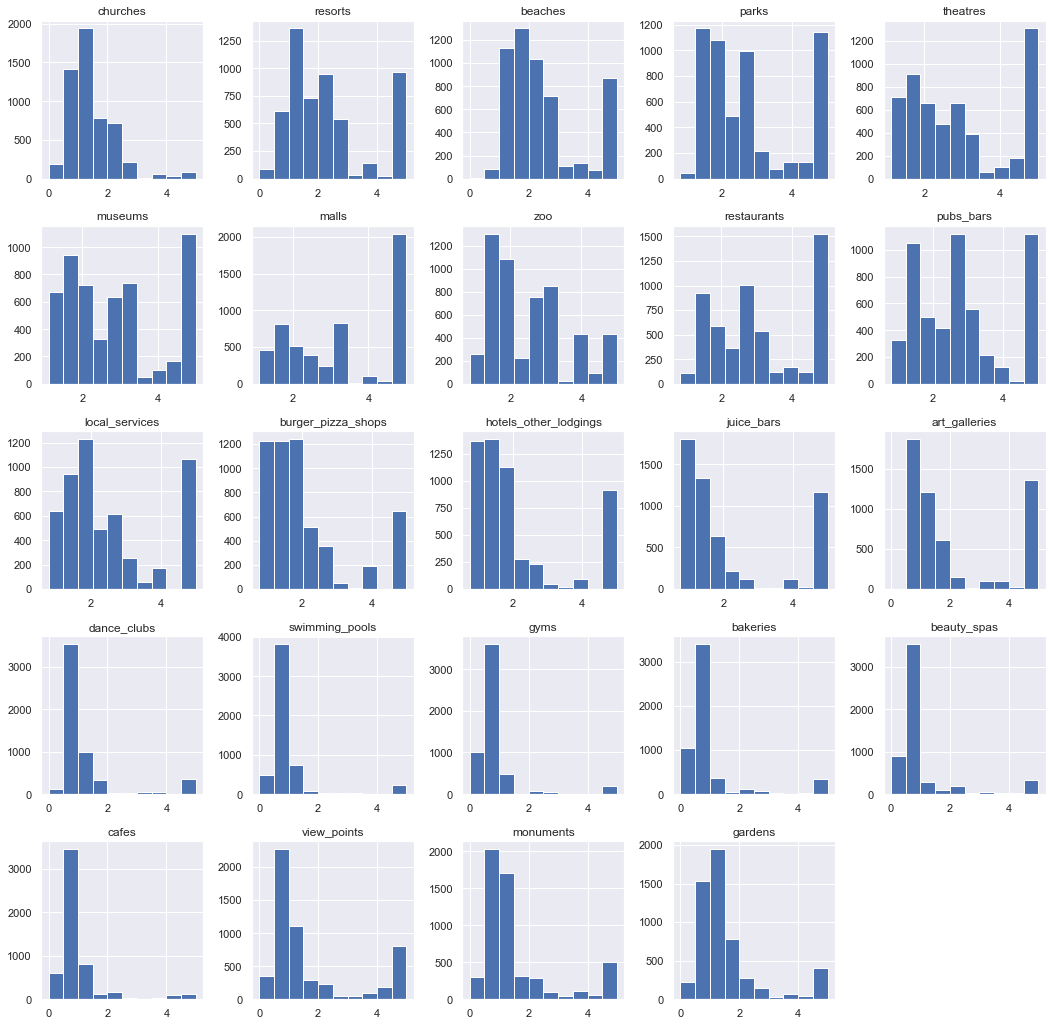

In [28]:
#PDFs of features
fig = data_no_missing.hist(figsize=(18, 18))

In [30]:
#check if users have rated all features
data_description = data_no_missing.describe()
rated = data_description.loc['min'] > 0
rated[rated]

parks                    True
theatres                 True
museums                  True
malls                    True
zoo                      True
restaurants              True
pubs_bars                True
local_services           True
burger_pizza_shops       True
hotels_other_lodgings    True
juice_bars               True
Name: min, dtype: bool

In [31]:
#creating the dataframe containing number of review for each feature
reviews = data_no_missing[column_names[1:]].astype(bool).sum(axis=0).sort_values()
reviews

bakeries                 4409
gyms                     4438
beauty_spas              4559
cafes                    4851
swimming_pools           4976
view_points              5110
monuments                5153
gardens                  5230
churches                 5260
dance_clubs              5343
resorts                  5365
art_galleries            5451
beaches                  5451
pubs_bars                5455
local_services           5455
zoo                      5455
hotels_other_lodgings    5455
juice_bars               5455
malls                    5455
museums                  5455
theatres                 5455
parks                    5455
restaurants              5455
burger_pizza_shops       5455
dtype: int64

In [32]:
column_names = data_no_missing.columns.values

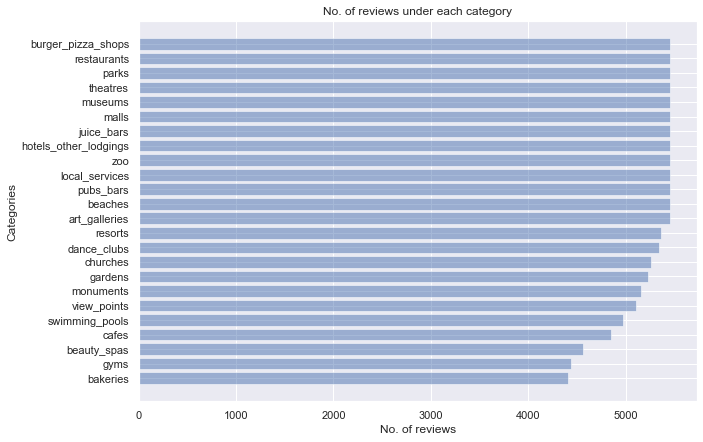

In [33]:
plt.figure(figsize=(10, 7))
plt.barh(np.arange(len(column_names[1:])), reviews.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])), reviews.index)
plt.xlabel('No. of reviews')
plt.ylabel('Categories')
plt.title('No. of reviews under each category')
plt.show()

In [34]:
#creating a dataframe to store no. of reviews by users
no_of_reviews = data_no_missing[column_names[1:]].astype(bool).sum(axis=1).value_counts()
no_of_reviews

24    3724
23     505
21     457
20     243
22     167
19     148
18     114
17      69
16      22
15       6
dtype: int64

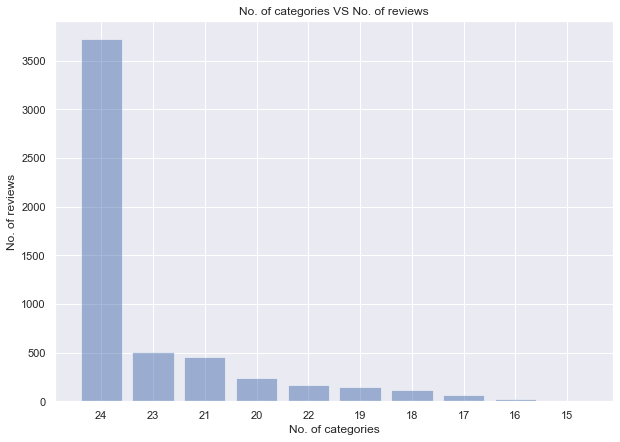

In [35]:
#plotting the no. of customers Vs no. of reviews
plt.figure(figsize=(10, 7))
plt.bar(np.arange(len(no_of_reviews)), no_of_reviews.values, align='center', alpha=0.5)
plt.xticks(np.arange(len(no_of_reviews)), no_of_reviews.index)
plt.xlabel('No. of categories')
plt.ylabel('No. of reviews')
plt.title('No. of categories VS No. of reviews')
plt.show()

In [37]:
#creating a dataframe to store average rating for each feature
avg_rating = data_no_missing[column_names[1:]].mean()  #average rating is calculated by dividing count by total number of observations
avg_rating = avg_rating.sort_values()  #sorting the rating in increasing order
avg_rating

gyms                     0.822374
swimming_pools           0.949175
cafes                    0.965098
bakeries                 0.969072
beauty_spas              0.999443
dance_clubs              1.192821
churches                 1.455674
monuments                1.530818
gardens                  1.560570
view_points              1.749941
burger_pizza_shops       2.078339
hotels_other_lodgings    2.125747
juice_bars               2.190346
art_galleries            2.206060
resorts                  2.319824
beaches                  2.489520
zoo                      2.541047
local_services           2.550071
parks                    2.797192
pubs_bars                2.833093
museums                  2.893809
theatres                 2.959278
restaurants              3.126301
malls                    3.351778
dtype: float64

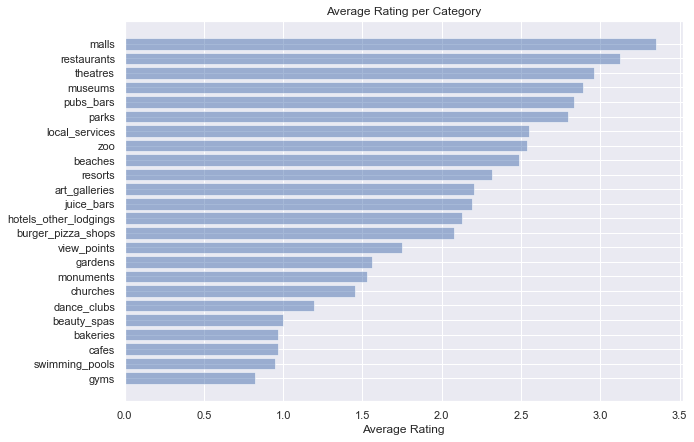

In [39]:
#plotting average rating plots
plt.figure(figsize=(10, 7))
plt.barh(np.arange(len(column_names[1:])), avg_rating.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])), avg_rating.index)
plt.xlabel('Average Rating')
plt.title('Average Rating per Category')
plt.show()

In [40]:
data_1 = data_no_missing.copy()
new = data_1['user_id'].str.split(' ', n=2, expand=True)
data_1['user'] = new[0]
data_1['id'] = new[1]
data_1 = data_1.drop(['user_id', 'user'], axis=1)
data_1.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,id
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,5


In [41]:
data_final = data_1.copy(deep=True)
data_final.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,id
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,5


**8. Heirarchical Clustering**